In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import umap.umap_ as umap
from tribus import run_tribus, heatmap_for_median_expression, umap_vis, z_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

In [70]:
# if save session
import dill
dill.dump_session('stellar_notebook_env.db')

In [2]:
# restore session
import dill
dill.load_session('stellar_notebook_env.db')

## Analysis STELLAR dataset donor_004

In [12]:
# read input files
sample_data = pd.read_csv(r'C:\\Users\\Public\\Farkkila_lab_datasets\\Tribus\\Test_case_data\\STELLAR\\input_data\\STELLAR_data_donor_004.csv',low_memory=False)
df = pd.ExcelFile(r"C:\\Users\\Public\\Farkkila_lab_datasets\\Tribus\\Test_case_data\\STELLAR\\stellar_logic_gate_v3_test.xlsx")
logic = pd.read_excel(df, df.sheet_names, index_col=0)
sample_data = sample_data.drop(["...1"], axis=1)
sample_data

MUC2      SOX9      MUC1      CD31   Synapto     CD49f      CD15   
0      -0.241565  0.538240 -0.145700 -0.254499 -0.312923 -0.440809 -0.083480  \
1      -0.231567  1.053268  0.015944 -0.248268 -0.314157  0.461514 -0.094145   
2       0.207531  0.526999 -0.057481 -0.249034 -0.325943  0.033951 -0.094142   
3      -0.076672 -0.420316 -0.051284 -0.252876 -0.302395  1.100307 -0.093069   
4      -0.235334  0.376148  0.025601 -0.251348 -0.316774 -0.074358 -0.094141   
...          ...       ...       ...       ...       ...       ...       ...   
248280 -0.301417 -0.480617 -0.485732 -0.247548 -0.075596 -0.601329 -0.296372   
248281 -0.302128 -0.469591 -0.486481 -0.201661 -0.252108 -0.632735 -0.291958   
248282 -0.300624 -0.505039 -0.481408 -0.206155 -0.257355 -0.611439 -0.297305   
248283 -0.241006 -0.217832 -0.350860 -0.235930  0.407688 -0.585294 -0.297135   
248284 -0.304218 -0.570549 -0.477373 -0.247548 -0.256739 -0.609668 -0.284186   

            CHGA      CDX2     ITLN1  ...     CD117      CD19  Podoplanin   
0      -0.073498 -0.182247 -0.395115  ... -0.104970 -0.094368   -0.208229  \
1      -0.087275  0.246550 -0.292916  ... -0.112135 -0.090799   -0.214242   
2      -0.086326 -0.005325 -0.288484  ... -0.116348 -0.095140   -0.216210   
3      -0.081959  0.005021 -0.355146  ... -0.123397 -0.096980   -0.218523   
4      -0.080630 -0.029893 -0.342737  ... -0.113671 -0.092804   -0.210291   
...          ...       ...       ...  ...       ...       ...         ...   
248280 -0.121456 -0.298825 -0.407754  ... -0.218121  0.454352   -0.302954   
248281 -0.089449 -0.345515 -0.399732  ... -0.210672 -0.161266   -0.315273   
248282 -0.096474 -0.338581 -0.430508  ... -0.213394 -0.075536   -0.337855   
248283 -0.069509 -0.099756 -0.256268  ... -0.183463 -0.104034    0.172151   
248284  0.213849 -0.260464 -0.427174  ...  0.064561  0.036991   -0.195175   

            CD45      CD56      CD69      Ki67     CD49a     CD163     CD161  
0      -0.378092 -0.248421 -0.255296 -0.270736 -0.574298 -0.274995 -0.083926  
1      -0.457434 -0.242000 -0.246320  0.161482 -0.484751 -0.265804 -0.052165  
2      -0.171199 -0.247935 -0.250225  0.360991 -0.517455 -0.274345 -0.062414  
3      -0.343095 -0.243046 -0.129018  0.137150 -0.460114 -0.274582 -0.063367  
4      -0.330390 -0.248646 -0.247002 -0.041417 -0.519680 -0.273687 -0.047192  
...          ...       ...       ...       ...       ...       ...       ...  
248280  0.108039 -0.183081 -0.127508 -0.275793 -0.448915 -0.329448 -0.110390  
248281 -0.144110 -0.280050 -0.275998 -0.298807 -0.648830 -0.263899 -0.104248  
248282 -0.202179 -0.278031 -0.298619 -0.290010 -0.616562 -0.280333 -0.082285  
248283  0.070700 -0.194168 -0.287577  0.012376 -0.387270 -0.120730 -0.058423  
248284 -0.551045 -0.033782 -0.384765 -0.085752 -0.460000 -0.309882  0.251603  

[248285 rows x 48 columns]

MUC2      SOX9      MUC1      CD31   Synapto     CD49f      CD15   
0      -0.241565  0.538240 -0.145700 -0.254499 -0.312923 -0.440809 -0.083480  \
1      -0.231567  1.053268  0.015944 -0.248268 -0.314157  0.461514 -0.094145   
2       0.207531  0.526999 -0.057481 -0.249034 -0.325943  0.033951 -0.094142   
3      -0.076672 -0.420316 -0.051284 -0.252876 -0.302395  1.100307 -0.093069   
4      -0.235334  0.376148  0.025601 -0.251348 -0.316774 -0.074358 -0.094141   
...          ...       ...       ...       ...       ...       ...       ...   
248280 -0.301417 -0.480617 -0.485732 -0.247548 -0.075596 -0.601329 -0.296372   
248281 -0.302128 -0.469591 -0.486481 -0.201661 -0.252108 -0.632735 -0.291958   
248282 -0.300624 -0.505039 -0.481408 -0.206155 -0.257355 -0.611439 -0.297305   
248283 -0.241006 -0.217832 -0.350860 -0.235930  0.407688 -0.585294 -0.297135   
248284 -0.304218 -0.570549 -0.477373 -0.247548 -0.256739 -0.609668 -0.284186   

            CHGA      CDX2     ITLN1  ...     CD117      CD19  Podoplanin   
0      -0.073498 -0.182247 -0.395115  ... -0.104970 -0.094368   -0.208229  \
1      -0.087275  0.246550 -0.292916  ... -0.112135 -0.090799   -0.214242   
2      -0.086326 -0.005325 -0.288484  ... -0.116348 -0.095140   -0.216210   
3      -0.081959  0.005021 -0.355146  ... -0.123397 -0.096980   -0.218523   
4      -0.080630 -0.029893 -0.342737  ... -0.113671 -0.092804   -0.210291   
...          ...       ...       ...  ...       ...       ...         ...   
248280 -0.121456 -0.298825 -0.407754  ... -0.218121  0.454352   -0.302954   
248281 -0.089449 -0.345515 -0.399732  ... -0.210672 -0.161266   -0.315273   
248282 -0.096474 -0.338581 -0.430508  ... -0.213394 -0.075536   -0.337855   
248283 -0.069509 -0.099756 -0.256268  ... -0.183463 -0.104034    0.172151   
248284  0.213849 -0.260464 -0.427174  ...  0.064561  0.036991   -0.195175   

            CD45      CD56      CD69      Ki67     CD49a     CD163     CD161  
0      -0.378092 -0.248421 -0.255296 -0.270736 -0.574298 -0.274995 -0.083926  
1      -0.457434 -0.242000 -0.246320  0.161482 -0.484751 -0.265804 -0.052165  
2      -0.171199 -0.247935 -0.250225  0.360991 -0.517455 -0.274345 -0.062414  
3      -0.343095 -0.243046 -0.129018  0.137150 -0.460114 -0.274582 -0.063367  
4      -0.330390 -0.248646 -0.247002 -0.041417 -0.519680 -0.273687 -0.047192  
...          ...       ...       ...       ...       ...       ...       ...  
248280  0.108039 -0.183081 -0.127508 -0.275793 -0.448915 -0.329448 -0.110390  
248281 -0.144110 -0.280050 -0.275998 -0.298807 -0.648830 -0.263899 -0.104248  
248282 -0.202179 -0.278031 -0.298619 -0.290010 -0.616562 -0.280333 -0.082285  
248283  0.070700 -0.194168 -0.287577  0.012376 -0.387270 -0.120730 -0.058423  
248284 -0.551045 -0.033782 -0.384765 -0.085752 -0.460000 -0.309882  0.251603  

[248285 rows x 48 columns]

In [3]:
logic

{'Global':              Stromal  Immune  Epithelial
 Marker                                  
 aSMA               1       0           0
 Podoplanin         1       0          -1
 CD49a              1       0           0
 CD90               1       0          -1
 Ki67              -1      -1           1
 CDX2              -1      -1           1
 Cytokeratin        0       0           1
 CD49f              0       0           1
 Vimentin           0       1          -1
 CD45               0       1          -1
 CD163              0       1          -1
 CD7               -1       1          -1,
 'Stromal':             Endothelial  Nerve  SmoothMuscle  Stroma  ICC  Lympatic
 Marker                                                             
 Vimentin              0      0             0       1    0         0
 Podoplanin            0      0             0       0    0         1
 aSMA                  0      0             1       0    0        -1
 Synapto               0      1             0

In [32]:
# Run Tribus
labels, scores = run_tribus(sample_data, logic, depth=1) # modify depth # approximate 15min to finish with depth = 2

Global, subsetting done
Global
Global, clustering done


In [33]:
labels.head(20)

Global       final_label
0         Epithelial        Epithelial
1         Epithelial        Epithelial
2         Epithelial        Epithelial
3         Epithelial        Epithelial
4         Epithelial        Epithelial
5         Epithelial        Epithelial
6         Epithelial        Epithelial
7         Epithelial        Epithelial
8         Epithelial        Epithelial
9         Epithelial        Epithelial
10  undefined_Global  undefined_Global
11        Epithelial        Epithelial
12        Epithelial        Epithelial
13        Epithelial        Epithelial
14        Epithelial        Epithelial
15        Epithelial        Epithelial
16        Epithelial        Epithelial
17        Epithelial        Epithelial
18        Epithelial        Epithelial
19        Epithelial        Epithelial

## Visualize the result and check the quality

In [34]:
np.unique(labels["final_label"])

array(['Epithelial', 'Immune', 'Stromal', 'undefined_Global'],
      dtype=object)

<BarContainer object of 4 artists>

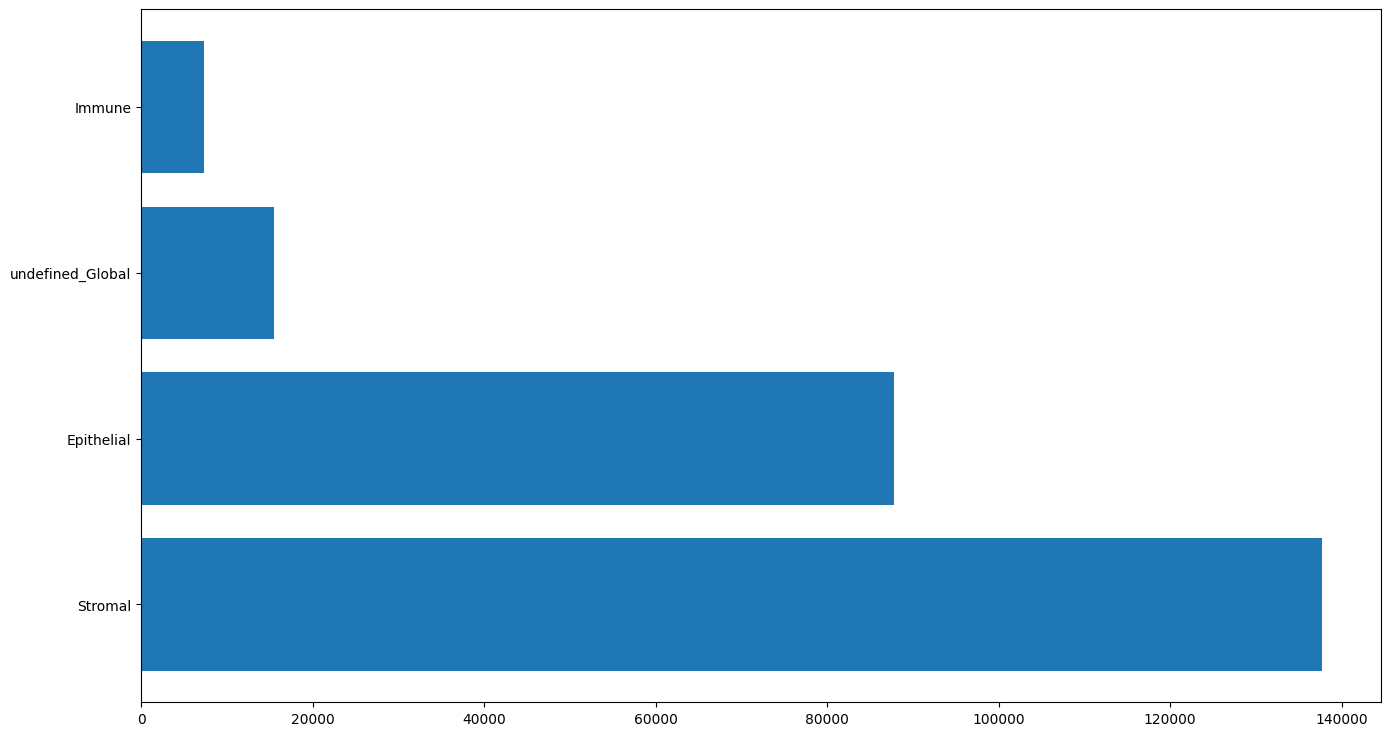

In [35]:
# Barplot, show the number of cells in each type
label_stat = labels["final_label"].value_counts().rename_axis('final_label').reset_index(name='count')
name = label_stat['final_label']
num = label_stat['count']
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(name, num)

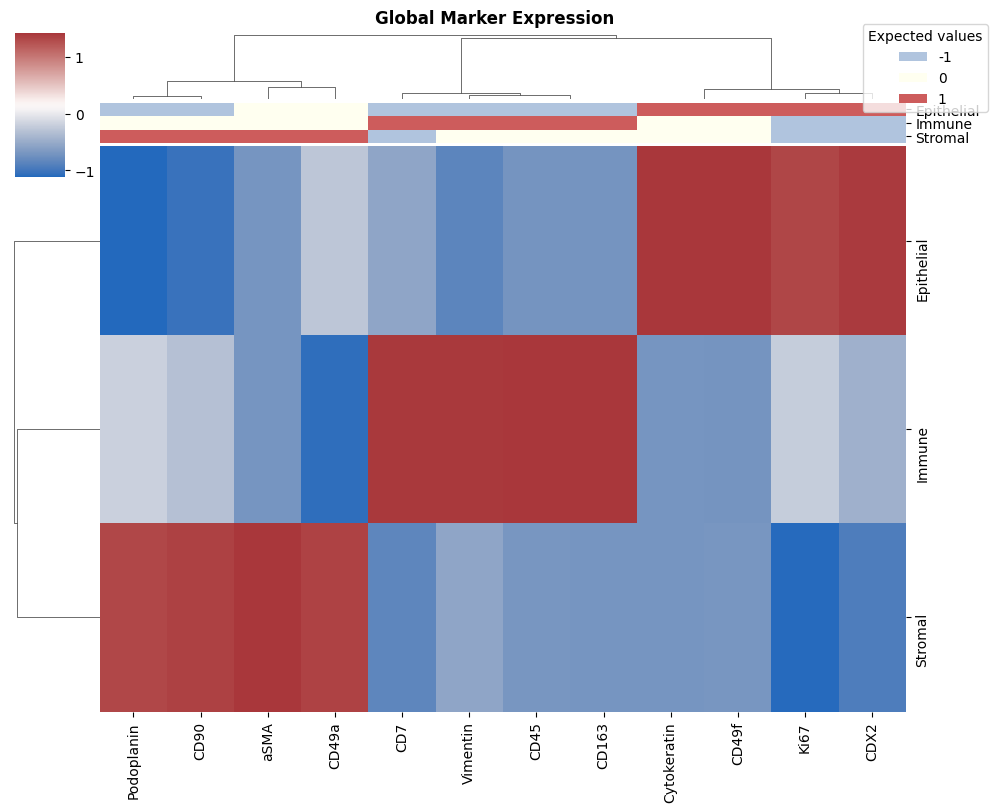

' heatmap_for_median_expression(sample_data, labels, logic, level="Myeloid", save=False, fname=None,\n                                  dpi=\'figure\', transform=stats.zscore, title="Myeloid Marker Expression",\n                                  c_palette=sns.color_palette([\'lightsteelblue\', \'ivory\', \'indianred\'], 3),\n                                  cmap_=\'vlag\', dendrogram_ratio_=0.1)\n\nheatmap_for_median_expression(sample_data, labels, logic, level="Lymphoid", save=False, fname=None,\n                                  dpi=\'figure\', transform=stats.zscore, title="Lymphoid Marker Expression",\n                                  c_palette=sns.color_palette([\'lightsteelblue\', \'ivory\', \'indianred\'], 3),\n                                  cmap_=\'vlag\', dendrogram_ratio_=0.1)\n\nheatmap_for_median_expression(sample_data, labels, logic, level="Stromal", save=False, fname=None,\n                                  dpi=\'figure\', transform=stats.zscore, title="Stromal Marke

In [36]:
# Marker Expression heatmap (use median value)

heatmap_for_median_expression(sample_data, labels, logic, level="Global", save=False, fname=None,
                                  dpi='figure', transform=z_score, title="Global Marker Expression",
                                  c_palette=sns.color_palette(['lightsteelblue', 'ivory', 'indianred'], 3),
                                  cmap_='vlag', dendrogram_ratio_=0.1)

""" heatmap_for_median_expression(sample_data, labels, logic, level="Myeloid", save=False, fname=None,
                                  dpi='figure', transform=stats.zscore, title="Myeloid Marker Expression",
                                  c_palette=sns.color_palette(['lightsteelblue', 'ivory', 'indianred'], 3),
                                  cmap_='vlag', dendrogram_ratio_=0.1)

heatmap_for_median_expression(sample_data, labels, logic, level="Lymphoid", save=False, fname=None,
                                  dpi='figure', transform=stats.zscore, title="Lymphoid Marker Expression",
                                  c_palette=sns.color_palette(['lightsteelblue', 'ivory', 'indianred'], 3),
                                  cmap_='vlag', dendrogram_ratio_=0.1)

heatmap_for_median_expression(sample_data, labels, logic, level="Stromal", save=False, fname=None,
                                  dpi='figure', transform=stats.zscore, title="Stromal Marker Expression",
                                  c_palette=sns.color_palette(['lightsteelblue', 'ivory', 'indianred'], 3),
                                  cmap_='vlag', dendrogram_ratio_=0.1) """

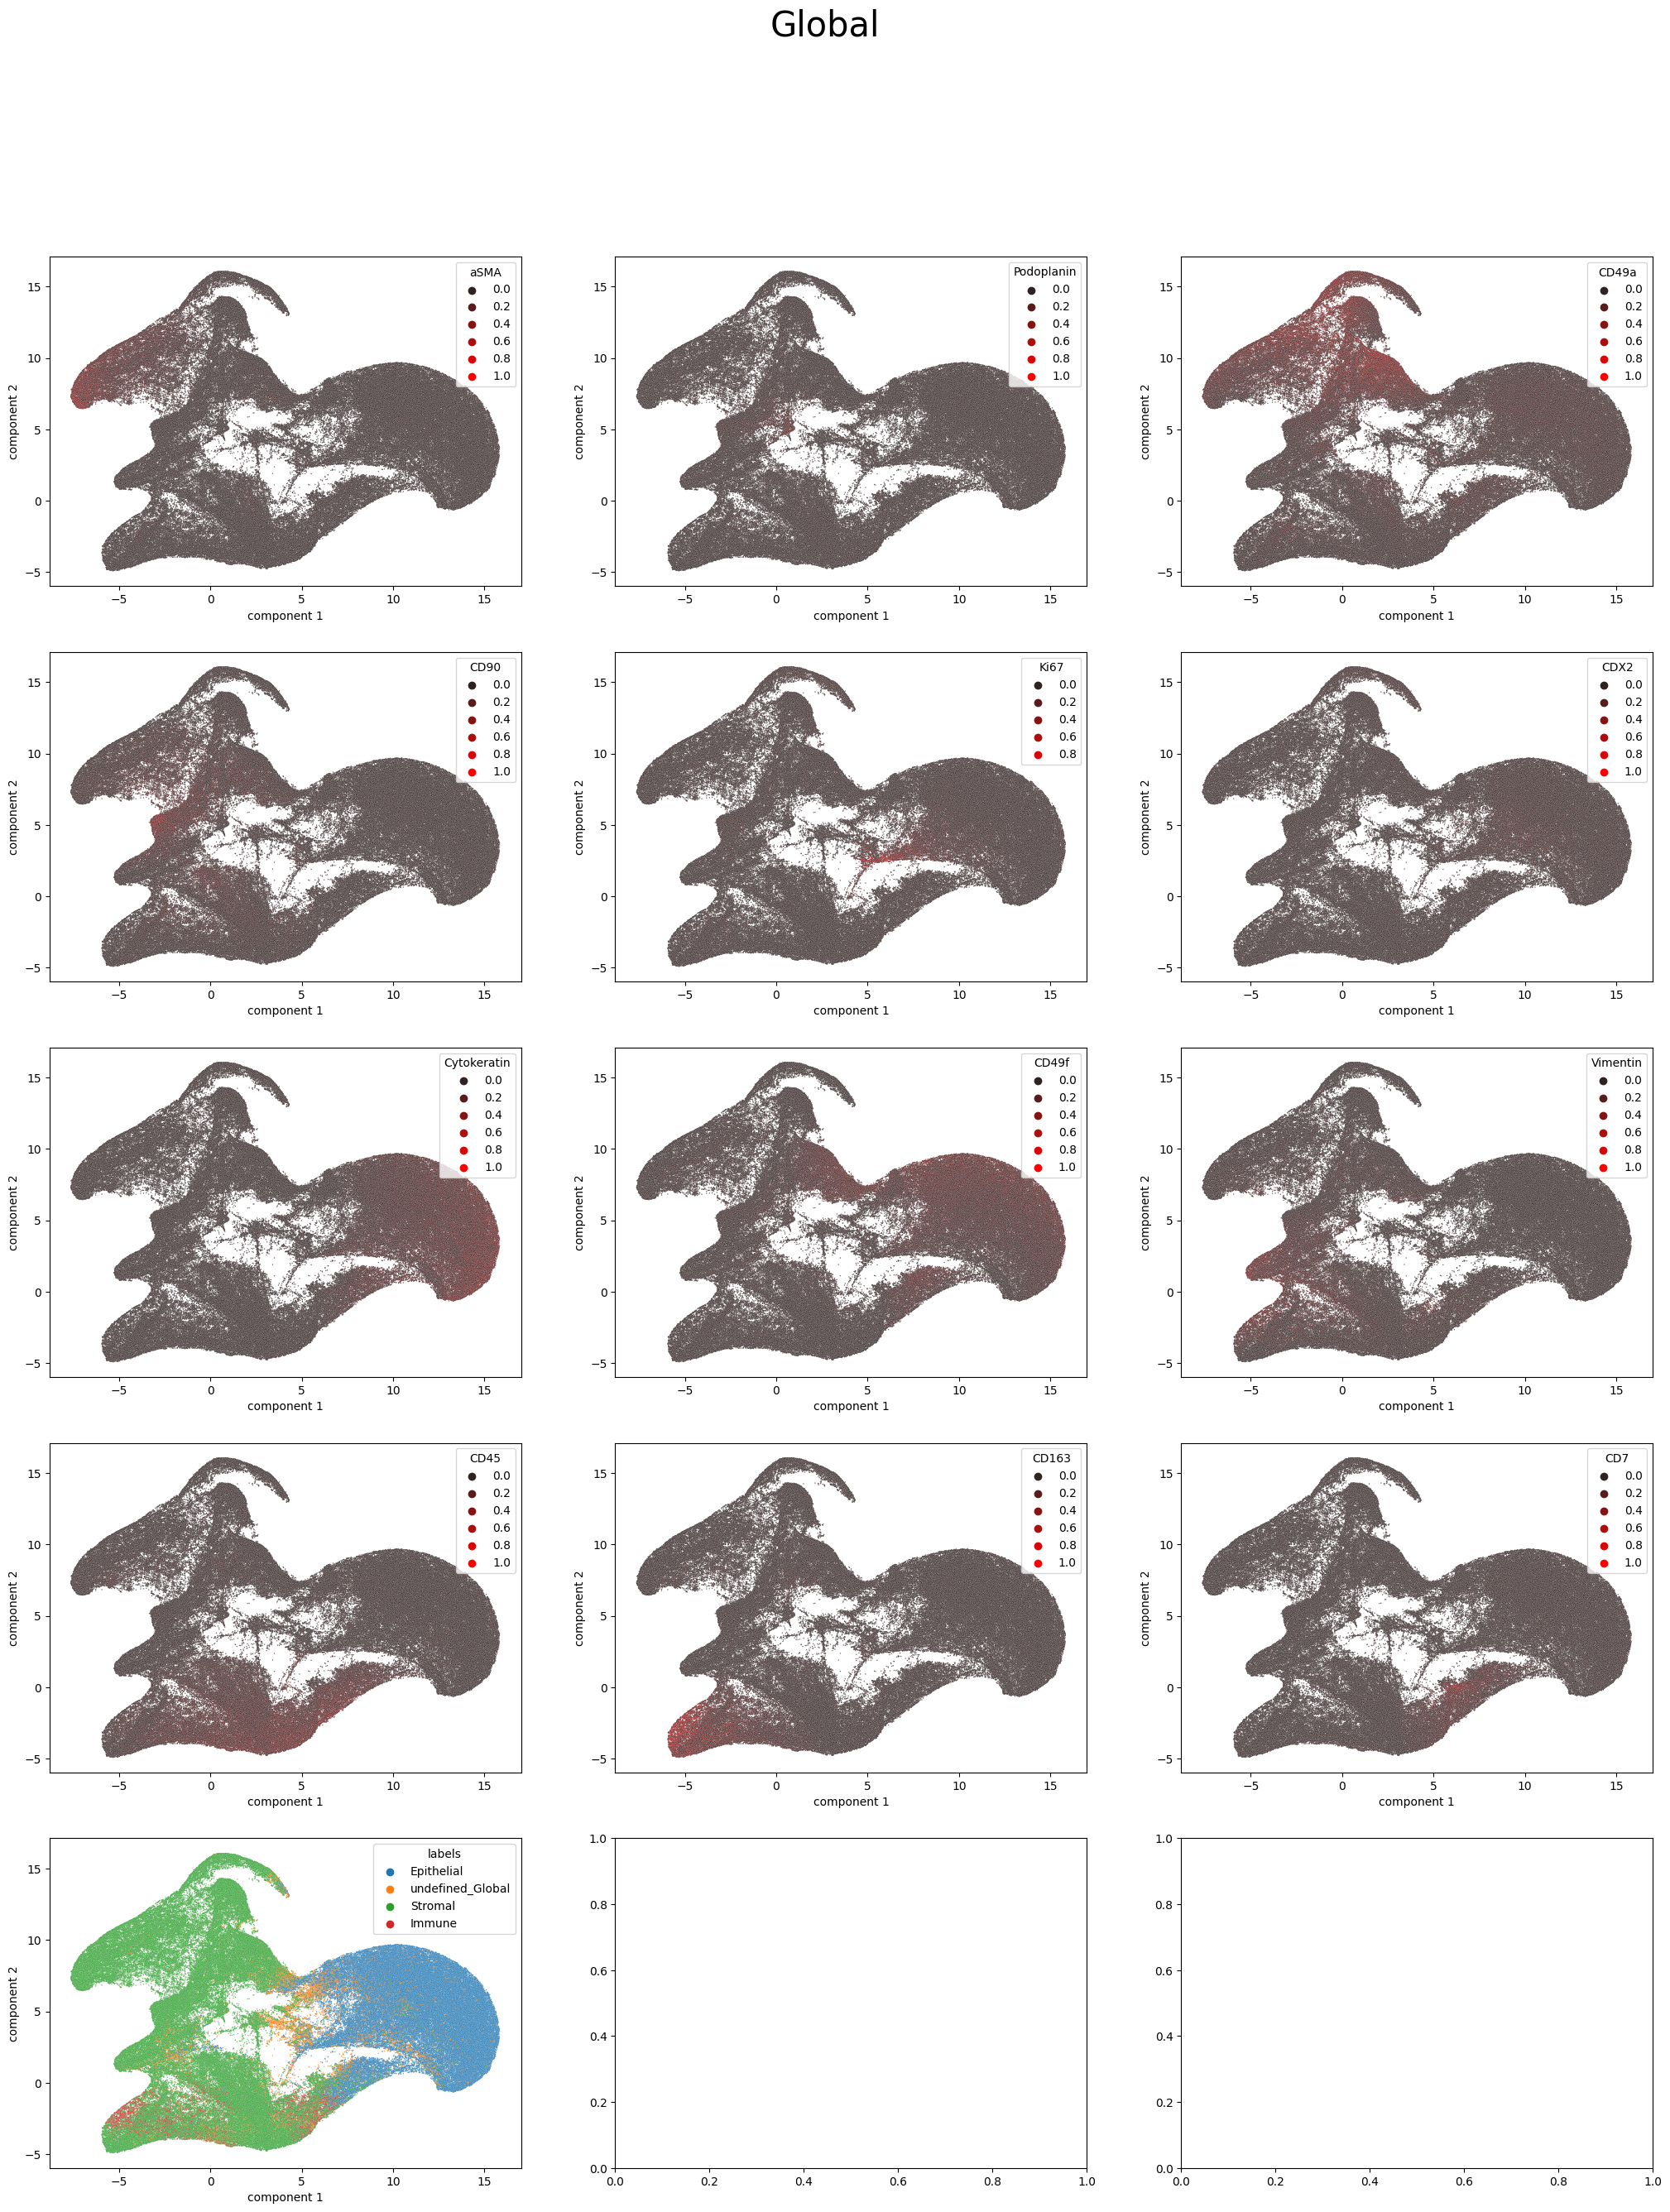

In [37]:
# scale the dataset into (0,1) before UMAP
scaler = MinMaxScaler() 
arr_scaled = scaler.fit_transform(sample_data)
sample_data_scaled = pd.DataFrame(arr_scaled, columns=sample_data.columns,index=sample_data.index)

umap_vis(sample_data_scaled, labels, markers=logic["Global"].index.values.tolist(), save=False, fname=None,  level="Global", title=None, init='spectral',
             random_state=0, n_neighbors=10, min_dist=0.1, metric='correlation', palette_markers='mycolormap',
             palette_cell='tab10', dpi='figure')

Text(33.081597222222214, 0.5, 'True')

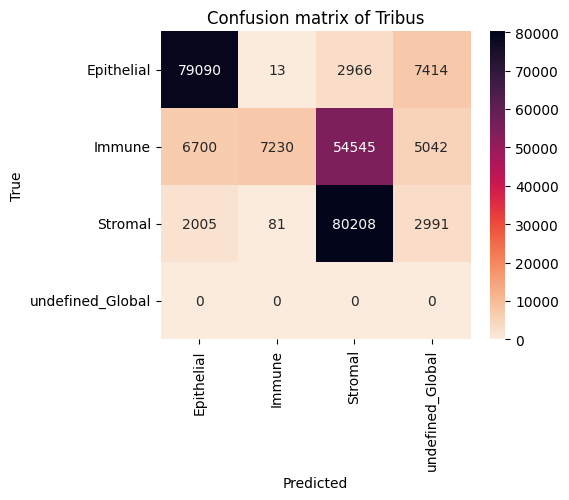

In [69]:
# confusion matrix
donor_004_upperlevel = pd.read_csv(r'C:\\Users\\Public\\Farkkila_lab_datasets\\Tribus\\Test_case_data\STELLAR\\input_data\\STELLAR_data_donor_004_upperlevel.csv',low_memory=False)
celltype_true = np.array(donor_004_upperlevel["cell_type_upperlevel"]).tolist()
celltype_pred = np.array(labels["final_label"]).tolist()
cm_labels = np.unique(labels["final_label"])
cm = confusion_matrix(celltype_true, 
                      celltype_pred, 
                      labels = cm_labels)

df_cm = pd.DataFrame(cm, index = cm_labels,
                  columns = cm_labels)
plt.figure(figsize = (5,4))
sns.heatmap(df_cm, fmt='g', annot=True, cmap=sns.cm.rocket_r)
plt.title('Confusion matrix of Tribus')
plt.xlabel('Predicted')
plt.ylabel('True')

In [55]:
np.array(donor_004_upperlevel["cell_type_upperlevel"])

array(['Epithelial', 'Epithelial', 'Epithelial', ..., 'Immune', 'Immune',
       'Epithelial'], dtype=object)

## Save the cell typing result if satisfied

In [8]:
labels.to_csv(r"C:\Users\Public\Farkkila_lab_datasets\Tribus\Test_case_data\STELLAR\output_data\STELLAR_celltyping_v3.csv")